In [1]:
import pandas as pd

In [2]:
data = pd.read_json('sale_data.json')

In [3]:
data.head()

,platform,link,price,address,description,housing_type,total_area,floor,total_floors,rooms_count,name,underground_name,underground_distance,published_at,latitude,longitude,payment_type,monthly_payment
0,domclick,https://domclick.ru/card/sale__flat__1987548956,22999990,"Россия, Москва, Ленинский проспект, 135к3",ОТЛИЧНОЕ ПРЕДЛОЖЕНИЕ! Успейте купить!\nПродает...,Квартира,73.0,5,16,3,"Сдается 3-комнатная, 73.0 м²",Тропарево,0.86,2023-12-08 15:15:48+00:00,55.641529,37.478307,premium,254921
1,domclick,https://domclick.ru/card/sale__flat__1999833410,8633000,"Россия, Москва, Ленинский проспект, 158",1414. Лот находится в платной брони.,Квартира,17.5,14,22,0,"Сдается 0-комнатная, 17.5 м²",Тропарево,1.30,2023-12-15 14:45:04.487887+00:00,55.651186,37.483095,premium,95684
2,domclick,https://domclick.ru/card/sale__flat__1889326688,14044800,"Россия, Москва, Суворовская улица, 19с2","Субсидированная ипотека от 12,8%! Акция ""Купи ...",Квартира,46.2,2,3,0,"Сдается 0-комнатная, 46.2 м²",Преображенская площадь,0.99,2023-10-07 21:41:51.530550+00:00,55.789709,37.708778,premium,155666
3,domclick,https://domclick.ru/card/sale__flat__1930836005,14300000,"Россия, Москва, Енисейская улица, 10",Продаётся уютная 3х комнатная квартира в 9-ти...,Квартира,50.5,2,9,3,"Сдается 3-комнатная, 50.5 м²",Свиблово,0.95,2023-11-05 08:52:00+00:00,55.860822,37.661230,premium,158494
4,domclick,https://domclick.ru/card/sale__flat__1964083748,7990000,"Россия, Москва, Электрозаводская улица, 14с1","Прекрасное предложение для тех, кто хочет полу...",Квартира,19.2,1,8,0,"Сдается 0-комнатная, 19.2 м²",Электрозаводская,0.98,2023-11-24 14:11:44.589536+00:00,55.787513,37.706766,premium,88557


In [4]:
# Удаляем бесполезные или нерелевантные признаки
data.drop(['platform', 'link', 'description', 'name', 'published_at', 'address'], axis=1, inplace=True)

In [5]:
# Заполним или удалим пустые значения
data.fillna(method='ffill', inplace=True)

In [6]:
data = pd.get_dummies(data, columns=['housing_type', 'payment_type', 'underground_name'])

In [7]:
data.head()

,price,total_area,floor,total_floors,rooms_count,underground_distance,latitude,longitude,monthly_payment,housing_type_Квартира,payment_type_premium,underground_name_Маяковская,underground_name_Нижегородская,underground_name_Преображенская площадь,underground_name_Саларьево,underground_name_Свиблово,underground_name_Селигерская,underground_name_Тропарево,underground_name_Электрозаводская,underground_name_станция Верхние Котлы
0,22999990,73.0,5,16,3,0.86,55.641529,37.478307,254921,1,1,0,0,0,0,0,0,1,0,0
1,8633000,17.5,14,22,0,1.30,55.651186,37.483095,95684,1,1,0,0,0,0,0,0,1,0,0
2,14044800,46.2,2,3,0,0.99,55.789709,37.708778,155666,1,1,0,0,1,0,0,0,0,0,0
3,14300000,50.5,2,9,3,0.95,55.860822,37.661230,158494,1,1,0,0,0,0,1,0,0,0,0
4,7990000,19.2,1,8,0,0.98,55.787513,37.706766,88557,1,1,0,0,0,0,0,0,0,1,0


In [8]:
# Целевая переменная (цена жилья)
y = data['price']

# Предикторы
X = data.drop('price', axis=1)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# Инициализация и обучение регрессионной модели
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
from sklearn.metrics import r2_score

In [14]:
# Предсказание цен для тестовой выборки
y_pred = model.predict(X_test)

In [15]:
# Вычисляем коэффициент детерминации R^2
score = r2_score(y_test, y_pred)
print(f'R^2: {score}')

R^2: 0.999999999998107


In [16]:
# Корреляция между факторами и ценой
correlations = data.corr()
print(correlations['price'].sort_values(ascending=False))

price                                      1.000000
monthly_payment                            1.000000
total_area                                 0.851973
floor                                      0.765272
rooms_count                                0.676910
underground_name_станция Верхние Котлы     0.579943
total_floors                               0.530374
longitude                                  0.222024
underground_name_Нижегородская             0.203716
underground_name_Тропарево                 0.121909
underground_name_Маяковская                0.109340
underground_name_Преображенская площадь    0.043098
underground_name_Свиблово                  0.042453
underground_name_Электрозаводская         -0.130015
underground_name_Саларьево                -0.160712
latitude                                  -0.198847
underground_name_Селигерская              -0.489315
underground_distance                      -0.529936
housing_type_Квартира                           NaN
payment_type

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

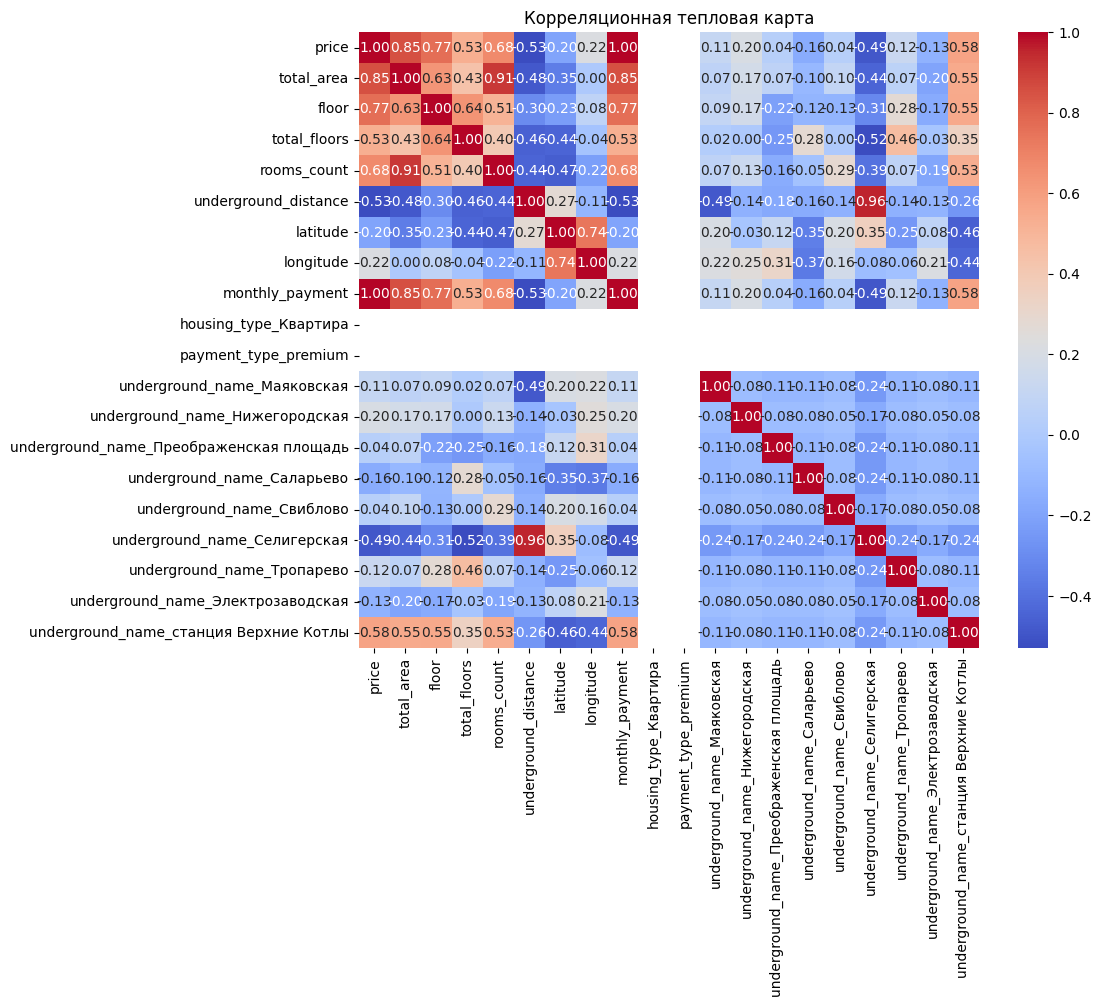

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная тепловая карта')
plt.show()

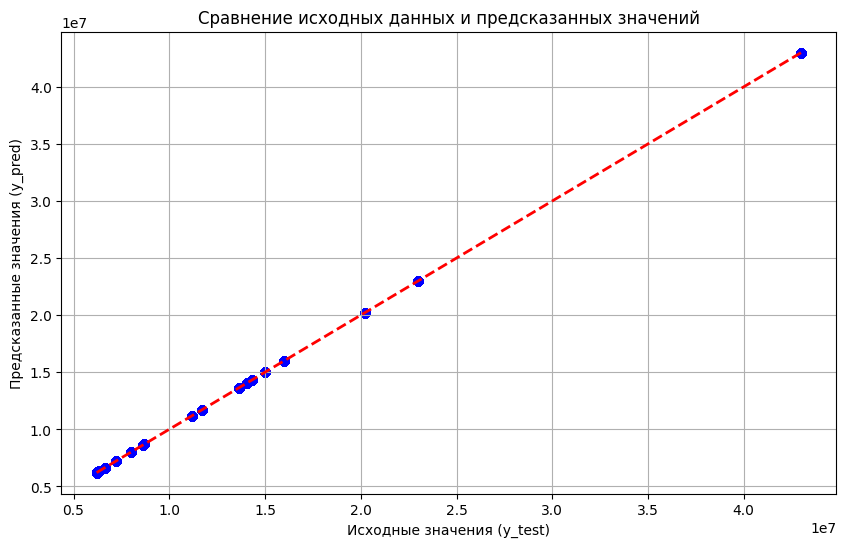

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# График сравнения исходных данных и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Исходные значения (y_test)')
plt.ylabel('Предсказанные значения (y_pred)')
plt.title('Сравнение исходных данных и предсказанных значений')
plt.grid()
plt.show()

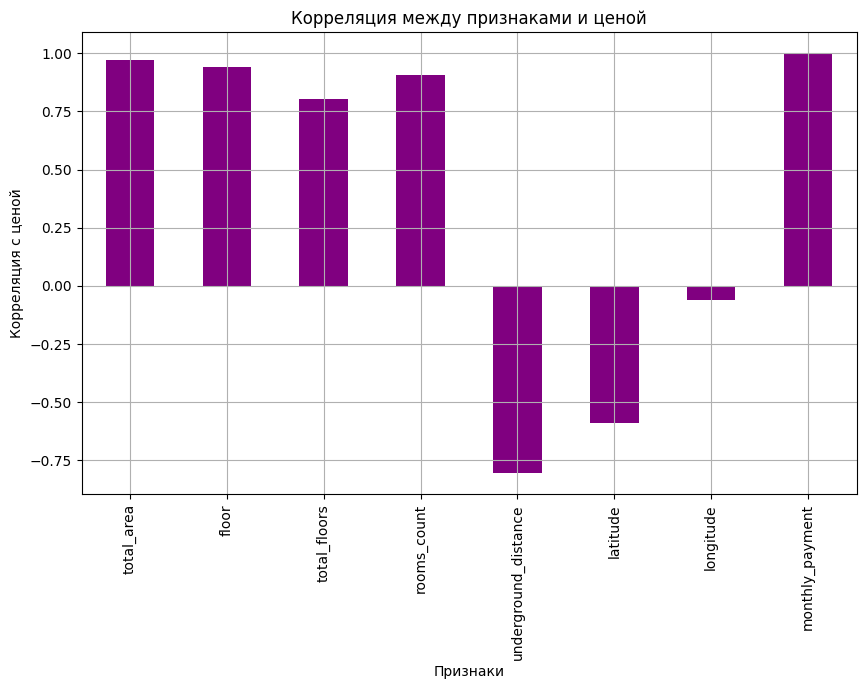

In [22]:
# График, отражающий корреляцию между ценой и исследуемыми признаками
prefixes = ['housing_type_', 'payment_type_', 'underground_name_']

relevant_correlations = correlations.corr()['price'].drop(index=['price'])
relevant_correlations = relevant_correlations[~relevant_correlations.index.str.startswith(tuple(prefixes))]

plt.figure(figsize=(10, 6))
relevant_correlations.plot(kind='bar', color='purple')
plt.xlabel('Признаки')
plt.ylabel('Корреляция с ценой')
plt.title('Корреляция между признаками и ценой')
plt.xticks(rotation=90)
plt.grid()
plt.show()

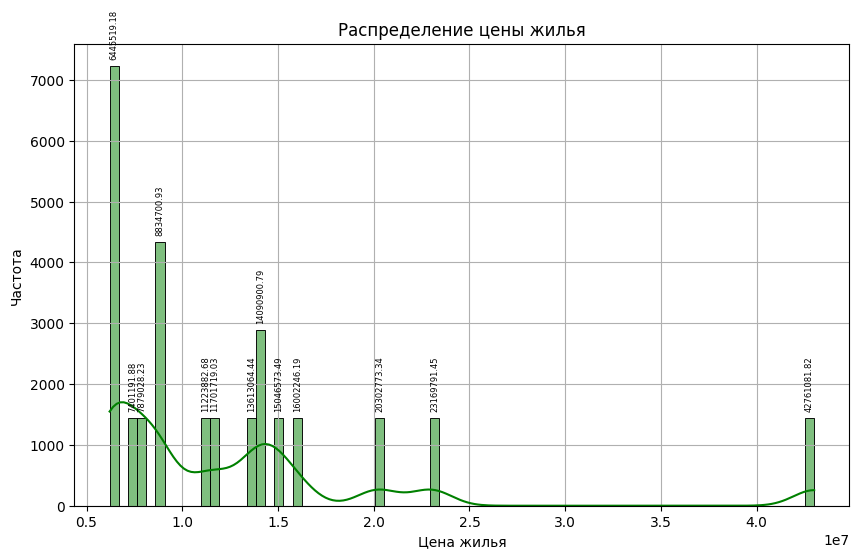

In [23]:
# Также отразим и распределение по ценам на жилье
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.histplot(data['price'], kde=True, color='green')
plt.xlabel('Цена жилья')
plt.ylabel('Частота')
plt.title('Распределение цены жилья')

height_threshold = ax.get_ylim()[1] * 0.05

for p in ax.patches:
    x_value = p.get_x() + p.get_width() / 2
    y_value = p.get_height()
    if y_value > height_threshold:
        ax.annotate(f'{x_value:.2f}', (x_value, y_value + 100), ha='center', va='bottom', rotation=90, fontsize=6)

plt.grid()
plt.show()

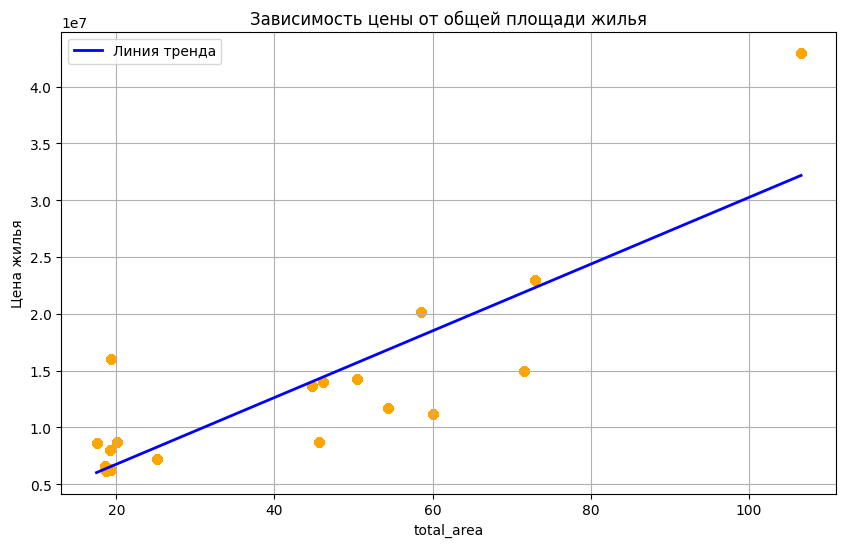

In [25]:
# График зависимости цены от общей площади жилья

plt.figure(figsize=(10, 6))
plt.scatter(data['total_area'], data['price'], color='orange', alpha=0.5)
plt.xlabel('total_area')
plt.ylabel('Цена жилья')
plt.title('Зависимость цены от общей площади жилья')

coefficients = np.polyfit(data['total_area'], data['price'], 1)
line_of_best_fit = np.poly1d(coefficients)

x_values = np.linspace(min(data['total_area']), max(data['total_area']), 100)
y_values = line_of_best_fit(x_values)

plt.plot(x_values, y_values, color='blue', linewidth=2, label='Линия тренда')

plt.grid()
plt.legend()
plt.show()

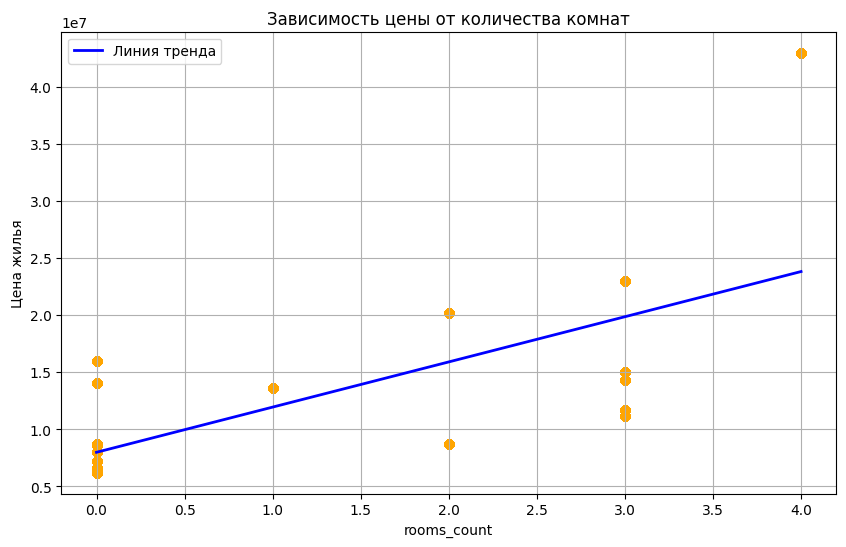

In [28]:
# График зависимости цены жилья от количества комнат

plt.figure(figsize=(10, 6))
plt.scatter(data['rooms_count'], data['price'], color='orange', alpha=0.5)
plt.xlabel('rooms_count')
plt.ylabel('Цена жилья')
plt.title('Зависимость цены от количества комнат')

coefficients = np.polyfit(data['rooms_count'], data['price'], 1)
line_of_best_fit = np.poly1d(coefficients)

x_values = np.linspace(min(data['rooms_count']), max(data['rooms_count']), 6)
y_values = line_of_best_fit(x_values)

plt.plot(x_values, y_values, color='blue', linewidth=2, label='Линия тренда')

plt.grid()
plt.legend()
plt.show()

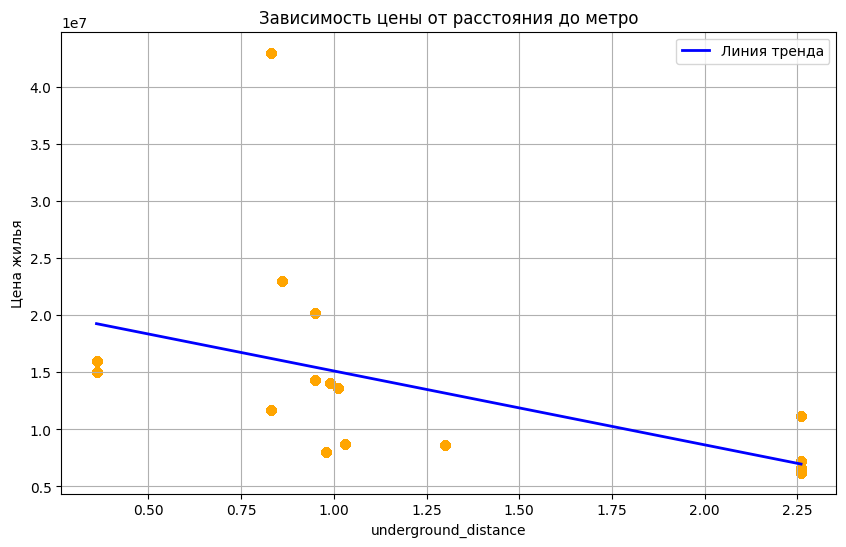

In [30]:
# График обратной зависимости цены жилья от расстояния до метро

plt.figure(figsize=(10, 6))
plt.scatter(data['underground_distance'], data['price'], color='orange', alpha=0.5)
plt.xlabel('underground_distance')
plt.ylabel('Цена жилья')
plt.title('Зависимость цены от расстояния до метро')

coefficients = np.polyfit(data['underground_distance'], data['price'], 1)
line_of_best_fit = np.poly1d(coefficients)

x_values = np.linspace(min(data['underground_distance']), max(data['underground_distance']), 10)
y_values = line_of_best_fit(x_values)

plt.plot(x_values, y_values, color='blue', linewidth=2, label='Линия тренда')

plt.grid()
plt.legend()
plt.show()